# Predicting Waste Generation
We will use waste generation data of different countries and try to predict it using that years GDP, Population, Income and Expenditure.
- Features/Predictors: GDP, Population, Income and Expenditure.

- Label/Target: Waste Generation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df.head()

,country_name,gdp,pop,inc,exp,waste
0,Tuvalu,3.921616e+07,11097,5070,0.0,3989.4865
1,Nauru,1.259303e+08,13049,10730,0.0,6191.7505
2,Marshall Islands,1.790418e+08,53066,4250,0.0,8614.0000
3,Kiribati,1.928691e+08,114395,3190,0.0,35723.8275
4,Palau,2.253080e+08,21503,15260,204456013.6,9426.7455


# Cleanup

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
country_name    216 non-null object
gdp             192 non-null float64
pop             216 non-null int64
inc             216 non-null int64
exp             216 non-null float64
waste           216 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.3+ KB


##### Dropping all rows with NaN values

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 6 columns):
country_name    192 non-null object
gdp             192 non-null float64
pop             192 non-null int64
inc             192 non-null int64
exp             192 non-null float64
waste           192 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.8+ KB


## Setting our features (X) and our target (y)

In [7]:
X = df.drop(['country_name', 'waste'], axis=1)
y = df['waste']

### Scaling the feature data to prepare for the KNN algorithm

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

##### We can see our scaled feature data below

In [11]:
scaled_feats = scaler.transform(X)
scaled_feats[:5]

array([[-0.26002276, -0.26638605, -0.43255752, -0.26862956],
       [-0.25996611, -0.26637232, -0.10527074, -0.26862956],
       [-0.2599314 , -0.26609084, -0.47997363, -0.26862956],
       [-0.25992237, -0.26565945, -0.54126762, -0.26862956],
       [-0.25990117, -0.26631285,  0.15667433, -0.26845391]])

##### A better view in a `DataFrame`

In [12]:
df_feat = pd.DataFrame(scaled_feats, columns=df.columns[1:-1])
df_feat.head()

,gdp,pop,inc,exp
0,-0.260023,-0.266386,-0.432558,-0.268630
1,-0.259966,-0.266372,-0.105271,-0.268630
2,-0.259931,-0.266091,-0.479974,-0.268630
3,-0.259922,-0.265659,-0.541268,-0.268630
4,-0.259901,-0.266313,0.156674,-0.268454


In [13]:
df_feat.describe().loc['mean':'std']

,gdp,pop,inc,exp
mean,4.625929e-17,-2.312965e-17,6.707597e-17,1.572816e-16
std,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00


## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.3, random_state=42)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(134, 58, 134, 58)

## K Nearest Neighbor (Regressor)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
k_range = range(1, 40)
accuracy_scores = []

for i in k_range:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracy_scores.append(knn.score(X_test, y_test))

In [19]:
np.array(accuracy_scores)

array([0.8466838 , 0.85216223, 0.8195608 , 0.80259577, 0.85169923,
       0.85016083, 0.85154851, 0.82017232, 0.79012363, 0.76299394,
       0.73919838, 0.71222424, 0.69448021, 0.68500934, 0.68139988,
       0.65272929, 0.62438177, 0.60473341, 0.59528311, 0.57223492,
       0.55429416, 0.54039508, 0.51724618, 0.51010004, 0.49172523,
       0.48454403, 0.46959661, 0.45773441, 0.44344792, 0.43398838,
       0.42890402, 0.41634573, 0.40375451, 0.40105854, 0.38964153,
       0.37760972, 0.36754492, 0.35715294, 0.34737924])

In [20]:
len(accuracy_scores), len(k_range)

(39, 39)

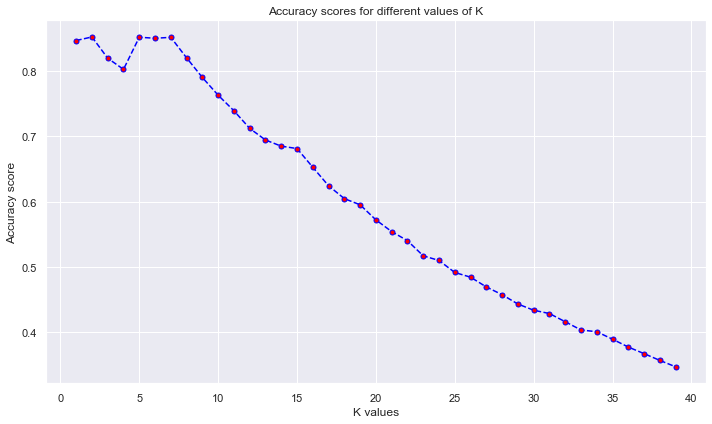

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', marker='o', markersize=5, markerfacecolor='red')
plt.title("Accuracy scores for different values of K")
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.tight_layout()

It seems that the best K values are attained at 2, 5, 6 & 7. Afterwards the model accuracy starts to drop off.

In [22]:
accuracy_scores = np.array(accuracy_scores)
print("Highest accuracy score achieved :", accuracy_scores.max())
print("K value with highest score      :", accuracy_scores.argmax()+1)

Highest accuracy score achieved : 0.8521622265484592
K value with highest score      : 2


In [23]:
accuracy_scores

array([0.8466838 , 0.85216223, 0.8195608 , 0.80259577, 0.85169923,
       0.85016083, 0.85154851, 0.82017232, 0.79012363, 0.76299394,
       0.73919838, 0.71222424, 0.69448021, 0.68500934, 0.68139988,
       0.65272929, 0.62438177, 0.60473341, 0.59528311, 0.57223492,
       0.55429416, 0.54039508, 0.51724618, 0.51010004, 0.49172523,
       0.48454403, 0.46959661, 0.45773441, 0.44344792, 0.43398838,
       0.42890402, 0.41634573, 0.40375451, 0.40105854, 0.38964153,
       0.37760972, 0.36754492, 0.35715294, 0.34737924])

It seems that using the 2 nearest neighbors, in this case, gives us the highest accuracy score.